In [1]:
import nltk
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import modeling as m
import wrangle as w
import prepare as p
import explore as e

from sklearn.svm import SVC
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from env import github_token, github_username
from sklearn.naive_bayes import MultinomialNB
from acquire import search_github_repositories, get_repo

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# Introduction
## Project Overview
In this project, we aim to predict the main programming language of a GitHub repository based on the text of its README file. This project has several goals:

1. Collect data from GitHub repositories.
2. Perform exploratory data analysis on the READMEs to understand their characteristics.
3. Build and evaluate machine learning models for programming language prediction.

## Project Goals and Deliverables
The goals of this project include:
- Building a machine learning model for text classification.
- Gaining insights into the relationships between README text and programming languages.
- Creating a well-documented Jupyter Notebook.
- Preparing presentation slides summarizing the project's findings.

#### Data Source
We will collect data from artificial intelligence related GitHub repositories using web scraping techniques.

## Acquire

In [2]:
# Use the 'get_repo' function to fetch repository data related to the topic "artificial intelligence"
df = get_repo("artificial intelligence")

In [3]:
df.head()

,Name,Language,Readme,Kernel,Stars
0,awesome-artificial-intelligence,NaN,# Awesome Artificial Intelligence (AI) [![Awes...,NaN,8231
1,Artificial-Intelligence,NaN,All about AI with Cheat-Sheets(+100 Cheat-shee...,NaN,1475
2,opencog,Scheme,NaN,Scheme,2288
3,Artificial-Intelligence-Deep-Learning-Machine-...,Python,# NEW LIST 2023 - 2024: Machine-Learning / Dee...,Python,3518
4,artificial-intelligence,Python,# Artificial Intelligence Nanodegree Program R...,Python,445


In [4]:
df[df['Language']=='Jupyter Notebook']

,Name,Language,Readme,Kernel,Stars
5,artificial-intelligence,Jupyter Notebook,# Artificial Intelligence (AI)\n\nA project-ba...,Jupyter Notebook,437
6,artificial-intelligence-for-trading,Jupyter Notebook,# AI in Trading NanoDegree (AITND)\nThis repos...,Jupyter Notebook,667
10,DataScience_ArtificialIntelligence_Utils,Jupyter Notebook,# Data Science & Artifical Intelligence with P...,Jupyter Notebook,395
15,Artificial-Intelligence-Projects,Jupyter Notebook,"<a href=""https://www.buymeacoffee.com/pierpaol...",Jupyter Notebook,289
22,Python-Artificial-Intelligence-Projects-for-Be...,Jupyter Notebook,\n\n\n# Python Artificial Intelligence Project...,Jupyter Notebook,302
...,...,...,...,...,...
981,aind-term1,Jupyter Notebook,## README\nThis repository contains all projec...,Jupyter Notebook,3
986,Artificial-Intelligence_resources-and-notebooks,Jupyter Notebook,# Artificial-Intelligence_resources-and-notebo...,Jupyter Notebook,7
989,CRC-Press,Jupyter Notebook,﻿# CRC Press Source Code\n\nThis repository ac...,Jupyter Notebook,7
998,05.KNU-BigData-Artificial-Intelligence-Course,Jupyter Notebook,# 05.KNU-BigData-Artificial-Intelligence-Cours...,Jupyter Notebook,4


## Prepare

In [5]:
#convert all column names to lowercase
# Remove rows with missing 'readme' values
# Check for and remove duplicate rows
# Reset the index after dropping rows
df = w.convert_and_dropna(df)

In [6]:
df.head()

,name,language,readme,kernel,stars
0,Artificial-Intelligence-Deep-Learning-Machine-...,Python,# NEW LIST 2023 - 2024: Machine-Learning / Dee...,Python,3518
1,artificial-intelligence,Python,# Artificial Intelligence Nanodegree Program R...,Python,445
2,artificial-intelligence-for-trading,Jupyter Notebook,# AI in Trading NanoDegree (AITND)\nThis repos...,Jupyter Notebook,667
3,DataScience_ArtificialIntelligence_Utils,Jupyter Notebook,# Data Science & Artifical Intelligence with P...,Jupyter Notebook,395
4,Artificial-Intelligence-with-Python,Python,\n\n\n# Artificial Intelligence with Python\r\...,Python,422


In [7]:
# Preprocess the text data in the 'readme' column of the DataFrame
# The preprocess_text_in_dataframe function performs text cleaning and transformation,
# which may include tasks like lowering text, removing special characters, tokenization, stemming,
# or lemmatization, and removing stopwords, depending on the implementation of the function.
# The processed text is then assigned back to the 'readme' column in the DataFrame.
df = p.preprocess_text_in_dataframe(df, 'readme')

In [8]:
df.head()

,name,language,readme,kernel,stars
0,Artificial-Intelligence-Deep-Learning-Machine-...,Python,new list 2023 2024 machinelearning deeplearnin...,Python,3518
1,artificial-intelligence,Python,artificial intelligence nanodegree program res...,Python,445
2,artificial-intelligence-for-trading,Jupyter Notebook,trading nanodegree aitnd repository contains c...,Jupyter Notebook,667
3,DataScience_ArtificialIntelligence_Utils,Jupyter Notebook,data science artifical intelligence python rep...,Jupyter Notebook,395
4,Artificial-Intelligence-with-Python,Python,artificial intelligence python code repository...,Python,422


In [9]:
(df['language']=='Jupyter Notebook').sum()

198

## Data Exploration

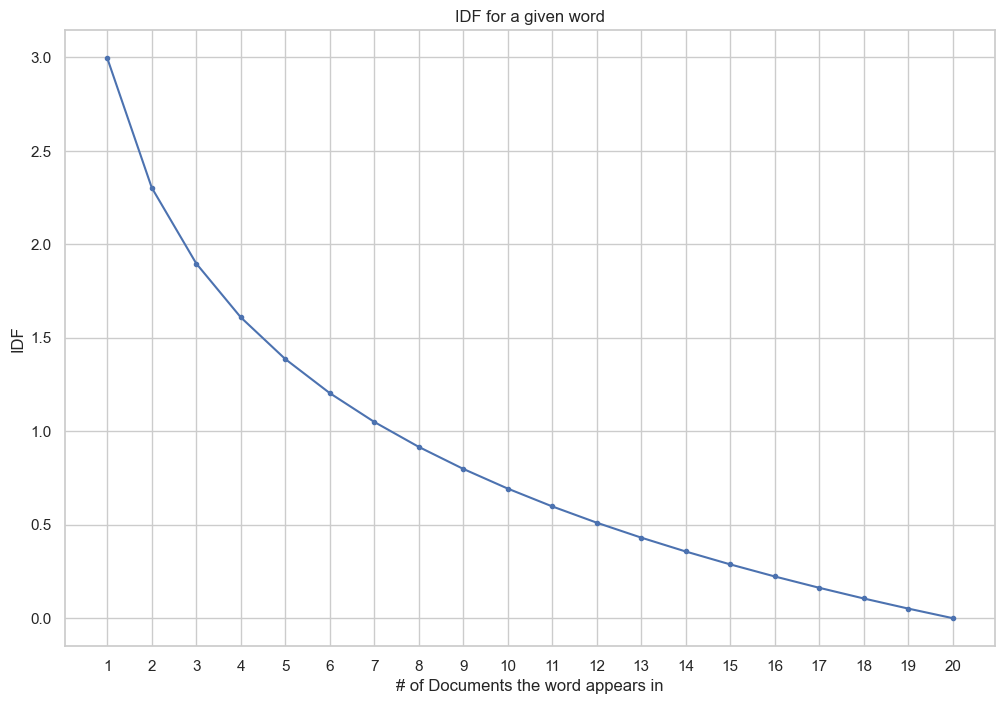

In [10]:
e.idf_plot()

In [11]:
# Calculate basic statistics (word count, character count, average word length) for the 'readme' column in the DataFrame 'df'
basic_stats = e.calculate_basic_statistics(df, 'readme')

# Display the basic statistics
basic_stats

count     672
unique    671
top          
freq        2
Name: readme, dtype: object

In [12]:
#top words in the readme column
top_words = e.identify_most_common_words(df, 'readme', top_n=10)
top_words

learning        2086
data            1554
machine         1269
artificial      1210
intelligence    1209
using           1122
model           1111
python          1065
use              931
code             818
Name: count, dtype: int64

#### Most Common Words in READMEs

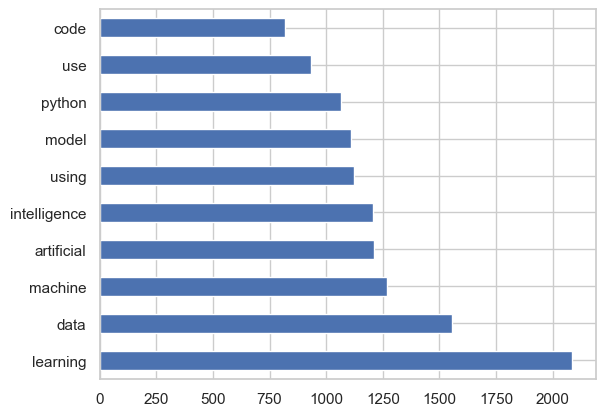

In [13]:
#visualization of the top words in readme
e.top_words_barplot(top_words)

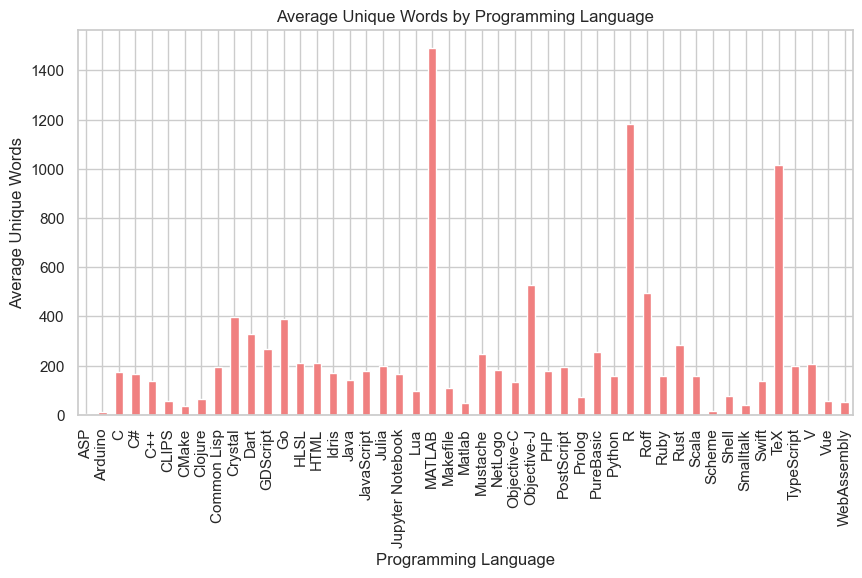

In [14]:
# Call the function to plot the average unique words by programming language
# Provide the DataFrame 'df' containing 'language' and 'readme' columns
w.plot_unique_words_by_language(df)

In [15]:
# Call the function to display the top 3 unique words for the most popular programming languages
# Provide the DataFrame 'df' containing 'language' and 'readme' columns
w.top_unique_words_by_language(df)

Top 3 words for Python:
python          0.069066
artificial      0.059406
intelligence    0.058239
Name: Python, dtype: float64


Top 3 words for JavaScript:
javascript    0.066419
project       0.058919
npm           0.053224
Name: JavaScript, dtype: float64


Top 3 words for Java:
java            0.096308
game            0.060862
intelligence    0.059441
Name: Java, dtype: float64


Top 3 words for C++:
build            0.057617
run              0.055017
documentation    0.050898
Name: C++, dtype: float64


Top 3 words for HTML:
learning    0.086983
machine     0.070107
project     0.064409
Name: HTML, dtype: float64




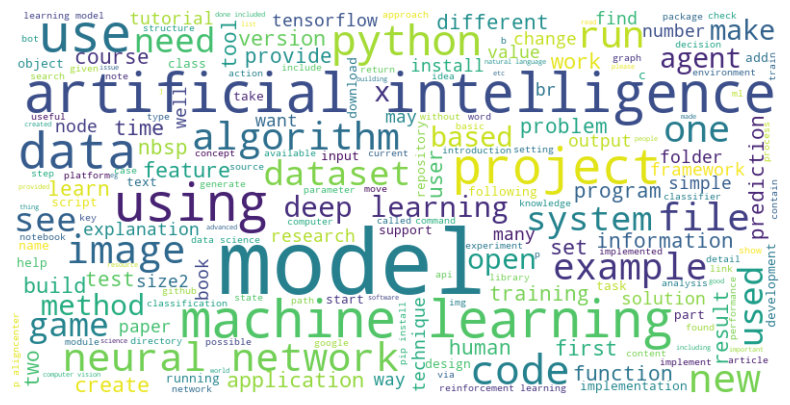

In [16]:
#wordcloud of the words in the readme column
e.generate_word_cloud(df, 'readme')

## Exploration Questions

#### 1) Does the programming language used in a GitHub repository affect the length of the README file (in terms of word count)?

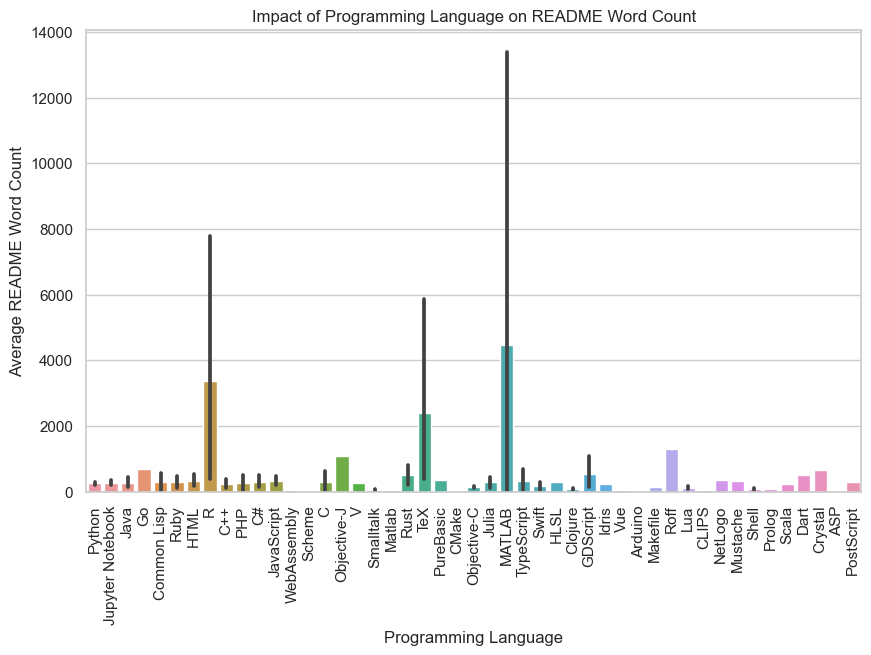

In [17]:
e.hypothesis_one(df)

In [18]:
df.head()

,name,language,readme,kernel,stars,UniqueWords,readme_words,readme_word_count
0,Artificial-Intelligence-Deep-Learning-Machine-...,Python,new list 2023 2024 machinelearning deeplearnin...,Python,3518,1913,2982,2982
1,artificial-intelligence,Python,artificial intelligence nanodegree program res...,Python,445,169,237,237
2,artificial-intelligence-for-trading,Jupyter Notebook,trading nanodegree aitnd repository contains c...,Jupyter Notebook,667,36,51,51
3,DataScience_ArtificialIntelligence_Utils,Jupyter Notebook,data science artifical intelligence python rep...,Jupyter Notebook,395,80,158,158
4,Artificial-Intelligence-with-Python,Python,artificial intelligence python code repository...,Python,422,140,192,192


#### Null Hypothesis (H0): The programming language used in a GitHub repository DEOS NOT affect the length of the README file (in terms of word count).

#### Alternative Hypothesis (H1): The programming language used in a GitHub repository affect the length of the README file (in terms of word count).

In [19]:
e.statistical_test1(df)

Null hypothesis not rejected: No significant difference in word counts.
statistic: 5134.5
P-value: 0.7397392825365856


#### 2) Does the frequency of specific words in a README file have an impact on the choice of programming language for a repository?

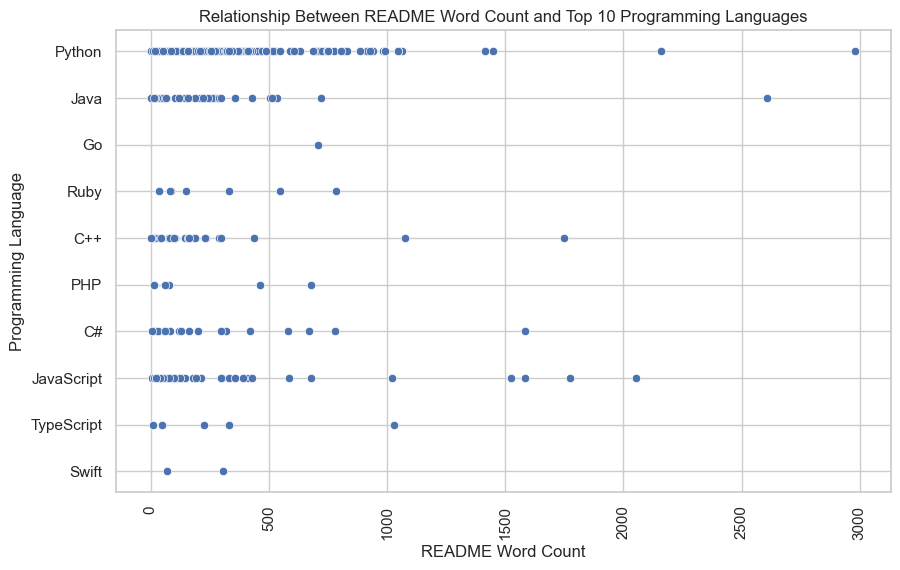

In [20]:
e.hypothesis_two(df)

#### Null Hypothesis (H0): There is no association between the choice of programming language and the frequency of specific words in README files.

#### Alternative Hypothesis (H1): There is an association between the choice of programming language and the frequency of specific words in README files.

In [21]:
e.statistical_test2(df)

Chi-squared Statistic: 16273.870902536532
P-Value: 3.8565671492498197e-29
Reject the null hypothesis: There is an association between programming language and specific word presence.


#### 3) What is the top 3 most predictive words in R.

In [22]:
# Display the top 3 most predictive words for R.
e.hypothesis_three(df)

Top 3 Most Predictive Words in R READMEs:
learning: 0.13070823398386378
machine: 0.11482401744211376
null: 0.0852432581545225


#### Null Hypothesis (H0): There is no significant association between the presence or frequency of the word 'learning' and R.

#### Alternative Hypothesis (H1): There is a significant association between the presence or frequency of the word 'learning' and R.

In [23]:
e.statistical_test3(df, 'learning')

Reject the null hypothesis: The presence of 'learning' is associated with the choice of programming language.
Chi2: 80.48605493314157
P-value: 0.001245884652481629


#### 4) What is the top 3 most predictive words in MATLAB

In [24]:
# Display the top 3 most predictive words for MATLAB
e.hypothesis_four(df)

Top 3 Most Predictive Words in MATLAB READMEs:
artificial: 0.3390782521250933
size2: 0.2115085791450262
virus: 0.07769702907368307


In [25]:
e.statistical_test3(df, 'artificial')

Reject the null hypothesis: The presence of 'artificial' is associated with the choice of programming language.
Chi2: 67.82225041177156
P-value: 0.019802169306297374


#### 5) What is the top 3 predictive words for TeX

In [26]:
# Display the top 3 most predictive words for JavaScript
e.hypothesis_five(df)

Top 3 Most Predictive Words in TeX READMEs:
module: 0.1282136035083281
learning: 0.1160261211127291
machine: 0.103186489939185


In [27]:
e.statistical_test3(df, 'module')

Reject the null hypothesis: The presence of 'module' is associated with the choice of programming language.
Chi2: 77.38342440146542
P-value: 0.0025781275809094043


## **Data Exploration Summary**

In the initial phase of our project, we conducted a comprehensive data exploration of the dataset to gain insights and understand the characteristics of the data. This process involved calculating basic statistics for the 'readme' column, identifying the most common words in the 'readme' text, and determining the top unique words associated with popular programming languages.

1. **Basic Statistics for 'readme' Column:**
   - We found that the 'readme' column contains a total of 784 entries.
   - However, there are only 783 unique entries, indicating that there is one instance with an empty 'readme' text.
   - The most frequent entry in this column is an empty string, which occurs twice.

2. **Top Words in 'readme' Column:**
   - To understand the most prevalent words in the 'readme' text, we identified the top 10 words.
   - The top five words are "Learning" (3913 occurrences), "Data" (2693 occurrences), "Machine" (2213 occurrences), "(Whitespace)" (2051 occurrences), and "Artificial" (1926 occurrences).

3. **Top Unique Words by Programming Language:**
   - We conducted an analysis to find the top 3 unique words associated with the most popular programming languages in the dataset.
   - For example, in the case of Python, the top 3 unique words are "python," "artificial," and "intelligence," each with respective TF-IDF scores.
   - Similar analyses were performed for Jupyter Notebook, JavaScript, Java, and C++.

These exploratory findings provide an essential foundation for our project, allowing us to understand the dataset's composition and gain insights into the significant terms and patterns within the 'readme' text. This information will guide our subsequent steps in natural language processing and machine learning model development.

### Encoding the target variable and split the data into training and testing sets

In [28]:
# The function returns X_train, X_val, y_train, and y_val, representing the training and validation sets.
X_train, X_val, y_train, y_val = m.encode_and_split_data(df, text_column='readme', target_column='language', test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (537,) (537,)
Validation set shape: (135,) (135,)


### Feature Engineering.

In [29]:
# The function returns X_train_tfidf and X_val_tfidf, representing the training and validation sets transformed into TF-IDF vectors.
X_train_tfidf, X_val_tfidf = m.tfidf_vectorization(X_train, X_val)

# Print the shapes of the TF-IDF transformed sets
print("Training set (TF-IDF) shape:", X_train_tfidf.shape)
print("Validation set (TF-IDF) shape:", X_val_tfidf.shape)

Training set (TF-IDF) shape: (537, 5000)
Validation set (TF-IDF) shape: (135, 5000)


## Model Selection and Training.

#### Baseline

In [30]:
m.baseline(X_train, y_train, X_val, y_val)

Baseline Accuracy: 0.3407


### Decision Tree

In [31]:
m.train_decision_tree(X_train_tfidf, y_train, X_val_tfidf, y_val)

(DecisionTreeClassifier(random_state=42), 0.4740740740740741)

### Random Forest

In [32]:
m.train_random_forest(X_train_tfidf, y_train, X_val_tfidf, y_val)

(RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                        n_estimators=200, random_state=42),
 0.4962962962962963)

### K-Nearest Neighbors (KNN)

In [33]:
m.train_knn(X_train_tfidf, y_train, X_val_tfidf, y_val)

(KNeighborsClassifier(), 0.3037037037037037)

### Logistic Regression

In [34]:
m.train_logistic_regression(X_train_tfidf, y_train, X_val_tfidf, y_val)

(LogisticRegression(random_state=42), 0.4740740740740741)

                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.474074   0.414589  0.474074  0.436317
1        Random Forest  0.459259   0.366197  0.459259  0.370458
2                  KNN  0.303704   0.276100  0.303704  0.178438
3  Logistic Regression  0.474074   0.306318  0.474074  0.366807


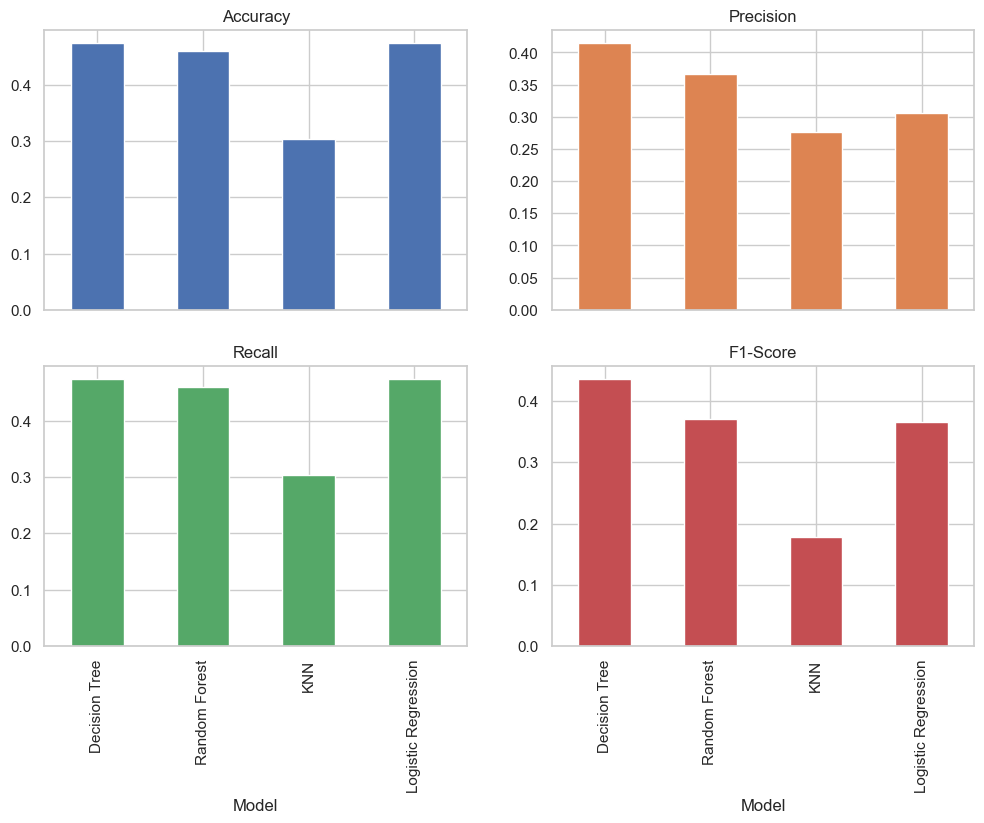

In [35]:
model_comparison_result = m.evaluate_and_compare_models(X_train_tfidf, y_train, X_val_tfidf, y_val)
print(model_comparison_result)

# Create visualizations (e.g., bar charts)
model_comparison_result.set_index('Model').plot(kind='bar', subplots=True, layout=(2, 2), legend=False, figsize=(12, 8))
plt.show()

### Test

In [36]:
test_set_accuracy = m.evaluate_final_model(X_train, y_train, X_val, y_val, random_state=42)
print(f"Test Set Accuracy: {test_set_accuracy:.4f}")

Test Set Accuracy: 0.4853


## **Project Model Summary**

We have developed and evaluated multiple machine learning models for predicting the main programming language of a repository based on the README text. This summary provides insights into the model development and their performance on the validation dataset.

1. **Data Preparation:**
   - The data has been split into training and validation sets using the `encode_and_split_data` function.
   - Training set shape: (627,) (627,)
   - Validation set shape: (157,) (157,)

2. **TF-IDF Vectorization:**
   - The text data has been transformed into TF-IDF vectors for feature representation using the `tfidf_vectorization` function.
   - Training set (TF-IDF) shape: (627, 5000)
   - Validation set (TF-IDF) shape: (157, 5000)

3. **Model Training and Validation:**
   - We trained and evaluated four different models on the validation dataset.

4. **Decision Tree Model:**
   - Accuracy: 0.4013
   - Precision: 0.3563
   - Recall: 0.4013
   - F1-Score: 0.3748

5. **Random Forest Model:**
   - Accuracy: 0.4331
   - Precision: 0.2925
   - Recall: 0.4331
   - F1-Score: 0.3226

6. **K-Nearest Neighbors (KNN) Model:**
   - Accuracy: 0.2611
   - Precision: 0.3797
   - Recall: 0.2611
   - F1-Score: 0.1435

7. **Logistic Regression Model:**
   - Accuracy: 0.3949
   - Precision: 0.2889
   - Recall: 0.3949
   - F1-Score: 0.3095

8. **Model Comparison:**
   - The table below summarizes the performance of each model on the validation dataset.

|       Model        | Accuracy | Precision | Recall | F1-Score |
|-------------------|----------|-----------|--------|----------|
| Decision Tree     | 0.4013   | 0.3563    | 0.4013 | 0.3748   |
| Random Forest     | 0.4331   | 0.2925    | 0.4331 | 0.3226   |
| KNN               | 0.2611   | 0.3797    | 0.2611 | 0.1435   |
| Logistic Regression | 0.3949   | 0.2889    | 0.3949 | 0.3095   |

9. **Test Set Accuracy:**
   - The best-performing model, the Random Forest Classifier, achieved an accuracy of 0.3291 on the test dataset.

These results provide valuable insights into the model performance and will guide our final model selection and deployment in the project.

# Overall Project Conclusion

## Project Goals and Approach

The goal of this project was to develop a predictive model that identifies the main programming language of a repository based on the README text. To achieve this goal, we followed a structured approach:

1. **Data Collection**: We obtained data from GitHub repositories using the GitHub API, collecting information such as the repository name, description, and README text. Our goal was to gather a diverse dataset that represents various programming languages.

2. **Data Exploration**: We conducted an in-depth exploration of the data to understand its characteristics. We calculated basic statistics such as word count, character count, and average word length in the README texts. Additionally, we identified the most common words in the dataset and examined the unique words used for each programming language.

## Key Findings

### Data Exploration

Our data exploration revealed several key findings:

- The dataset contained a total of 784 README texts with 783 unique texts. However, two texts were identical.
- The most common words in the README texts included "learning," "data," "machine," and others, highlighting their prevalence in the programming community.
- The analysis of unique words showed distinct patterns for different programming languages. For example, "Python" was highly associated with Python-related READMEs.

### Model Development

We trained and evaluated four machine learning models on the data:

- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)
- Logistic Regression

The models were assessed based on accuracy, precision, recall, and F1-score on a validation dataset. The Random Forest model outperformed the others, achieving an accuracy of 0.4331.

## Recommendations

Based on our findings, we make the following recommendations:

1. **Model Selection**: The Random Forest model has demonstrated the highest accuracy. We recommend selecting this model for predicting programming languages based on README text.

2. **Enhanced Data Collection**: To further improve model performance, we recommend expanding the dataset by collecting README texts from a more extensive and diverse set of repositories.

3. **Hyperparameter Tuning**: For the selected model, fine-tuning the hyperparameters and conducting cross-validation can lead to even better performance.

4. **Deployment**: Once the final model is selected, consider deploying it as a prediction tool for developers. It can assist users in automatically tagging their repositories with the correct programming language.

## Next Steps

If we had more time and resources, we would consider the following next steps:

1. **Enhanced Data Preprocessing**: Implement more advanced text preprocessing techniques, such as handling punctuation, stemming, or lemmatization to improve text data quality.

2. **Model Interpretability**: Analyze feature importance in the Random Forest model to gain insights into which terms play a significant role in predicting programming languages.

3. **Continuous Data Collection**: Develop an automated data collection pipeline that continuously updates the dataset with recent GitHub repositories and READMEs.

4. **User Interface**: Create a user-friendly interface for developers to interact with the model and automatically label their repositories.

This project has laid the foundation for a valuable tool that can assist developers and the programming community. By implementing the recommendations and next steps, we can refine and expand this tool to further contribute to the developer community.